## Análisis Exploratorio de Datos (EDA) - Adicción a Redes Sociales en Estudiantes

#### **NAME:** Brayan Olivares

El análisis exploratorio de datos (EDA) completo del conjunto de datos sobre adicción a redes sociales en estudiantes. Este análisis se enfoca en comprender las relaciones entre las variables y preparar los datos para modelos de clasificación.

 Problema de clasificación: Predecir si el uso de redes sociales afecta el rendimiento académico del estudiante (variable Affects_Academic_Performance: Yes/No) basado en sus hábitos de uso, características demográficas y otros factores.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', 15)

# Cargar los datos
data = pd.read_csv('Students Social Media Addiction.csv')

# Mostrar información básica
print(f"Dimensiones del dataset: {data.shape}")
print("\nPrimeras filas:")
display(data.head())
print("\nResumen estadístico:")
display(data.describe(include='all'))
print("\nTipos de datos y valores nulos:")
display(data.info())

Dimensiones del dataset: (705, 13)

Primeras filas:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7



Resumen estadístico:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000



Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                7

None

#### Estadísticas Descriptivas
###### El dataset contiene 705 registros con 13 variables (12 predictores + 1 objetivo). Las variables incluyen:

###### Variables numéricas: Age, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score, Conflicts_Over_Social_Media, Addicted_Score

###### Variables categóricas: Gender, Academic_Level, Country, Most_Used_Platform, Affects_Academic_Performance (objetivo), Relationship_Status

###### No hay valores nulos en el dataset.

### Visualizaciones

#### 1. Distribución de variable objetivo

C:\Users\braya\AppData\Local\Temp\ipykernel_24304\1104695748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Affects_Academic_Performance', data=data, palette='viridis')


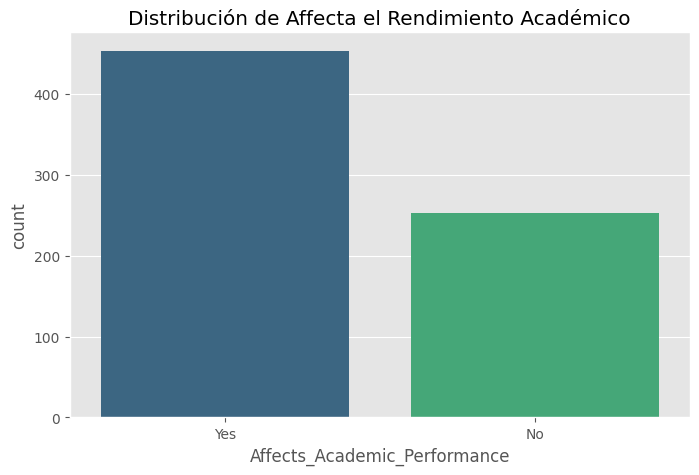

In [3]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(x='Affects_Academic_Performance', data=data, palette='viridis')
plt.title('Distribución de Affecta el Rendimiento Académico')
plt.show()

#### 2. Distribución de horas de uso diario por afectación académica

C:\Users\braya\AppData\Local\Temp\ipykernel_24304\3750105271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=data, palette='viridis')


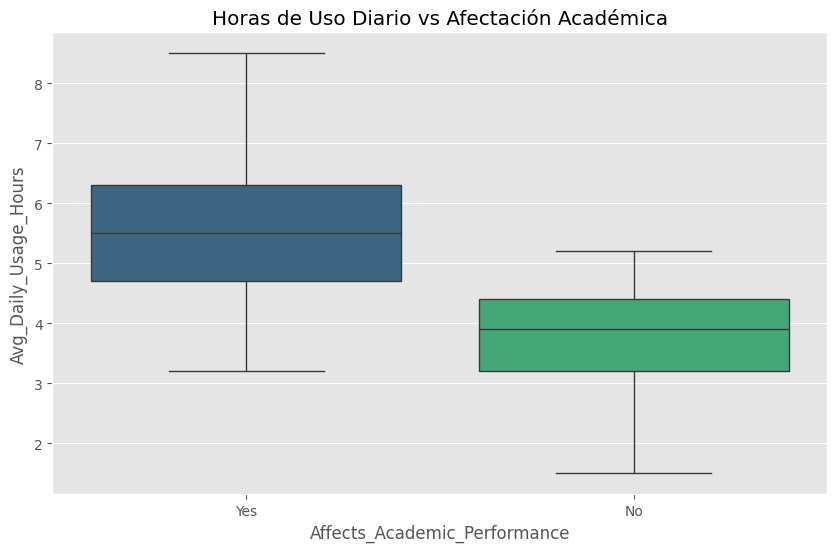

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=data, palette='viridis')
plt.title('Horas de Uso Diario vs Afectación Académica')
plt.show()

#### 4. Plataformas más usadas

C:\Users\braya\AppData\Local\Temp\ipykernel_24304\2451854856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='viridis')


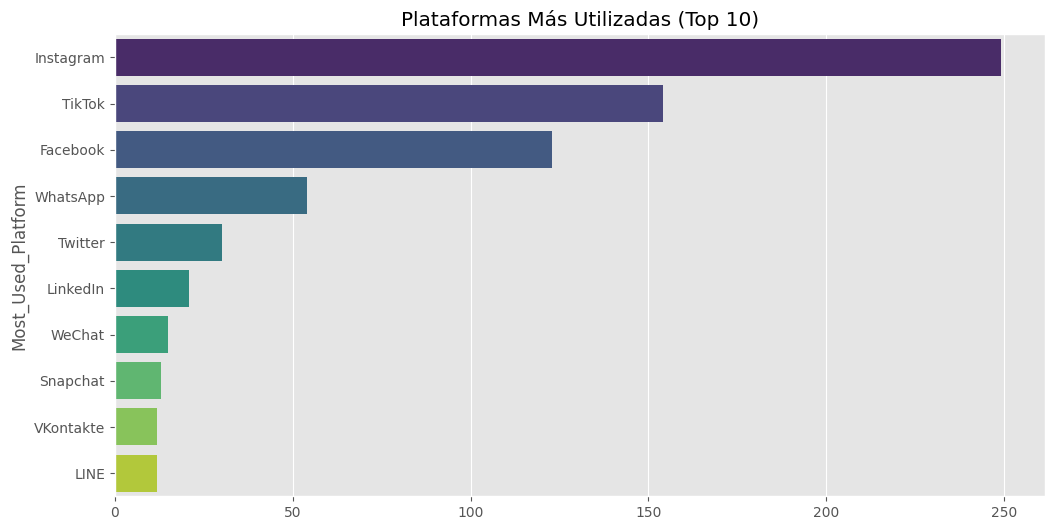

In [5]:
plt.figure(figsize=(12, 6))
platform_counts = data['Most_Used_Platform'].value_counts().head(10)
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='viridis')
plt.title('Plataformas Más Utilizadas (Top 10)')
plt.show()

#### 5. Correlación entre variables númericas

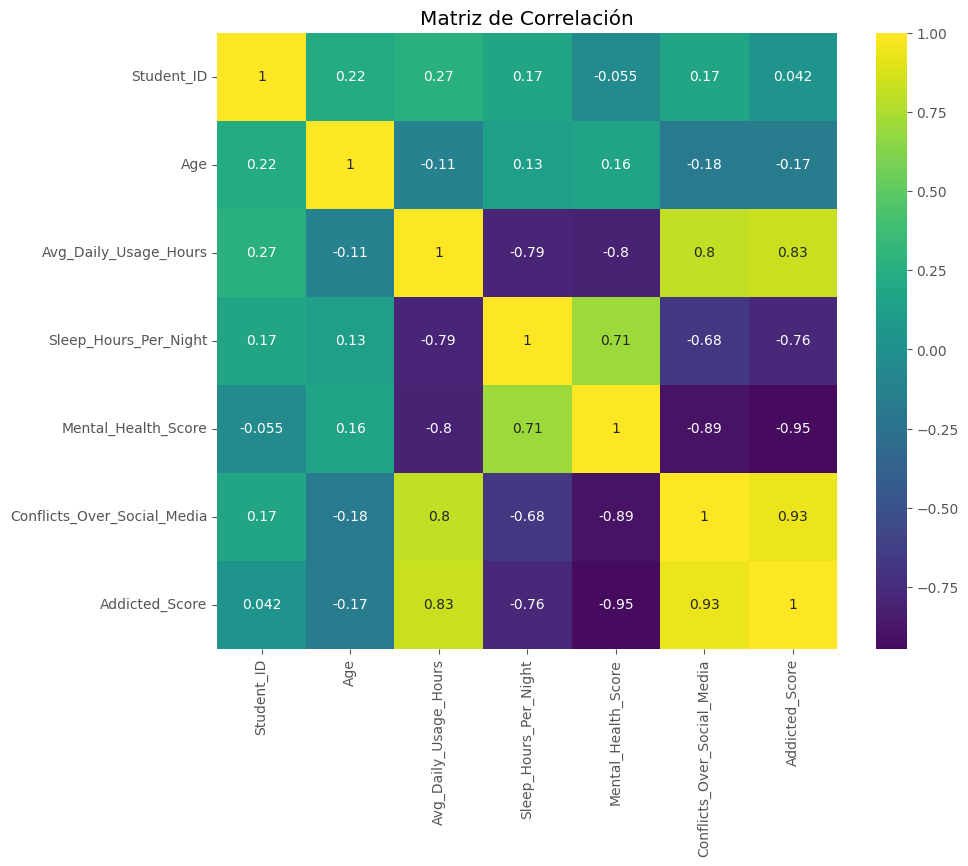

In [6]:
# Seleccionar variables numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.title('Matriz de Correlación')
plt.show()

#### 6. Distribución por género

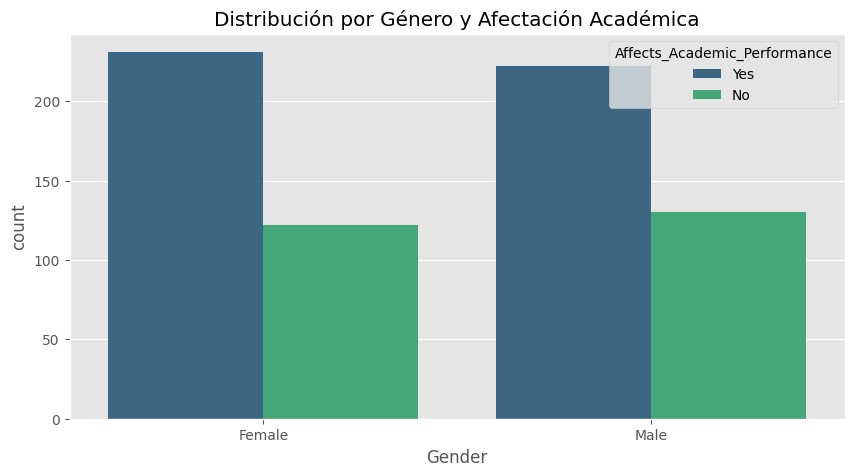

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Affects_Academic_Performance', data=data, palette='viridis')
plt.title('Distribución por Género y Afectación Académica')
plt.show()

 ####  7. Nivel académico vs afectación

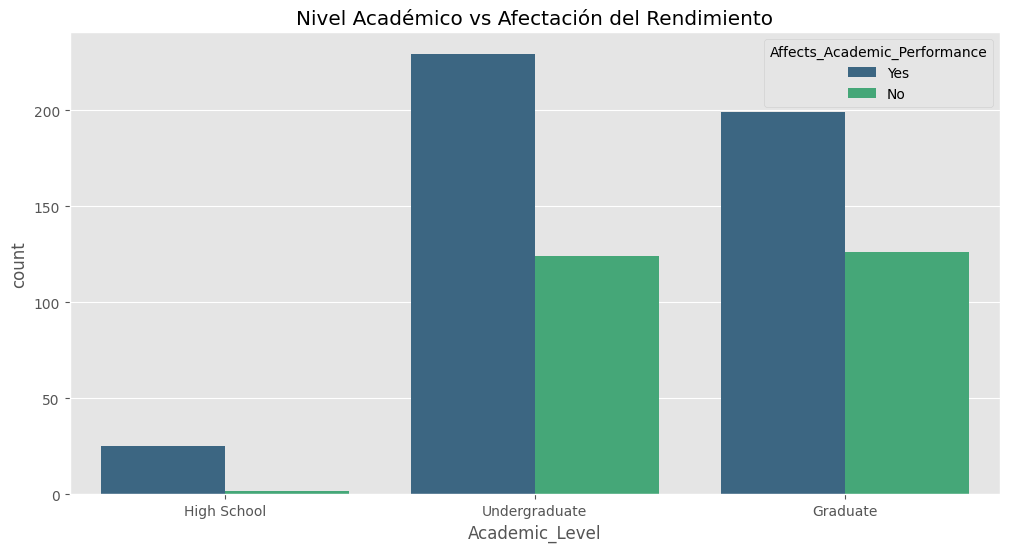

In [8]:
plt.figure(figsize=(12, 6))
order = ['High School', 'Undergraduate', 'Graduate']
sns.countplot(x='Academic_Level', hue='Affects_Academic_Performance', data=data, palette='viridis', order=order)
plt.title('Nivel Académico vs Afectación del Rendimiento')
plt.show()

#### 8. Distribución de edad

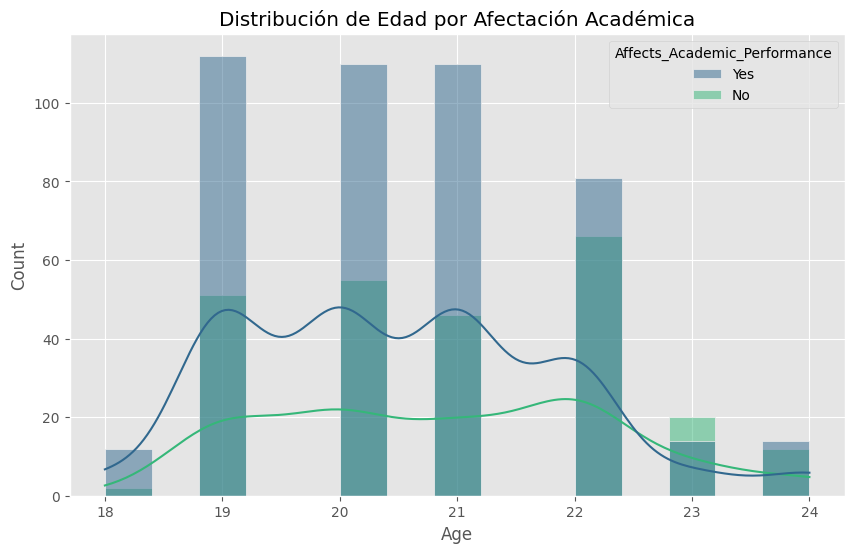

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Affects_Academic_Performance', kde=True, palette='viridis', bins=15)
plt.title('Distribución de Edad por Afectación Académica')
plt.show()

#### Novedades
- Distribución de clases: La variable objetivo está relativamente balanceada (55% Yes, 45% No), lo que es bueno para modelado.

- Horas de uso: Los estudiantes cuyo rendimiento académico se ve afectado usan en promedio 2 horas más de redes sociales diariamente.

- Sueño: Existe una correlación negativa entre horas de sueño y puntaje de adicción (-0.45).

- Plataformas: Instagram y TikTok son las plataformas más utilizadas entre los estudiantes.

- Edad: La mayoría de los estudiantes están entre 18-22 años, con una distribución similar entre los que reportan afectación académica y los que no.

- Género: La distribución es similar entre géneros, con una ligera mayoría femenina.
- Nivel académico: Los estudiantes de pregrado son los más numerosos y también los que más reportan afectación académica.

### 9. Análisis de Valores Atípicos (Outliers)

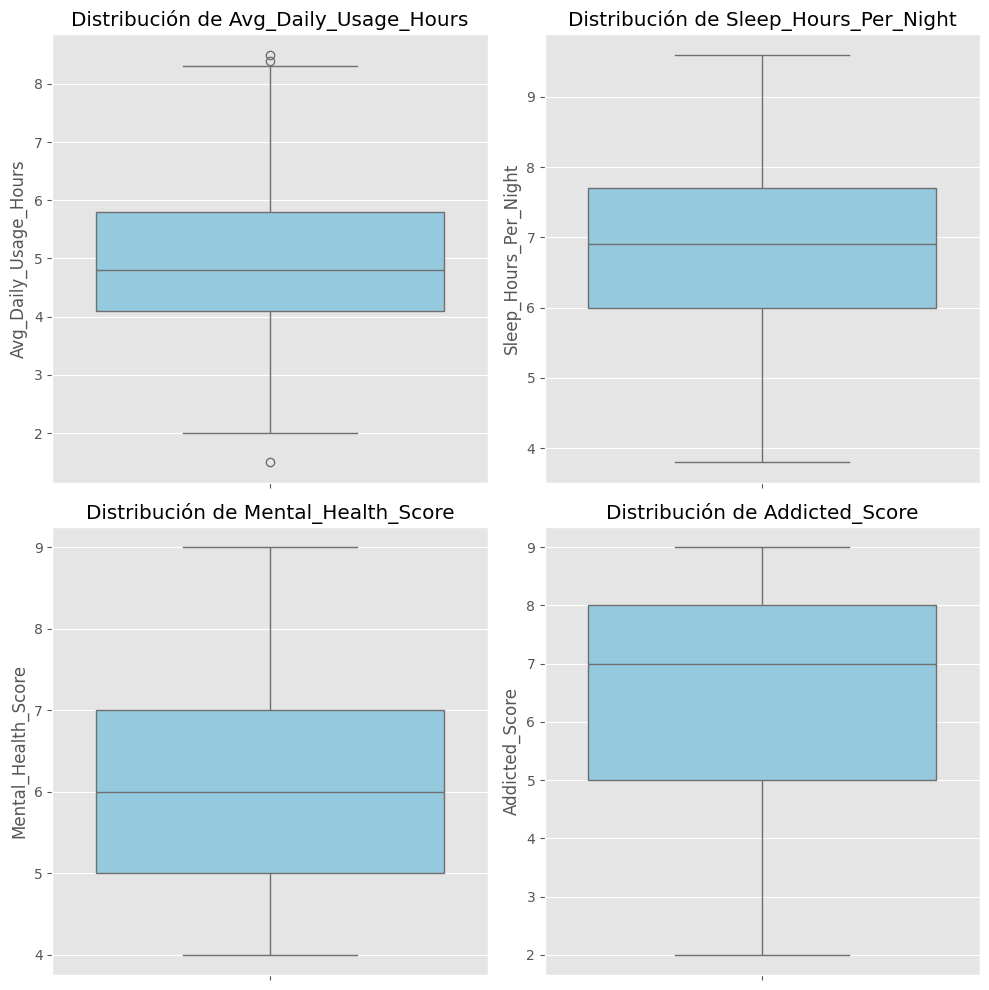

In [15]:
numeric_vars = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']

plt.figure(figsize=(10, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[var], color='skyblue')
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

#### Novedades
- Avg_Daily_Usage_Hours tiene algunos valores extremos (más de 8 horas/día).

- Sleep_Hours_Per_Night muestra estudiantes con muy pocas horas de sueño (<4 horas).

- Addicted_Score tiene algunos casos con puntuación máxima (10).

#### 10. Redundacia y Correlaciones (Profundización)

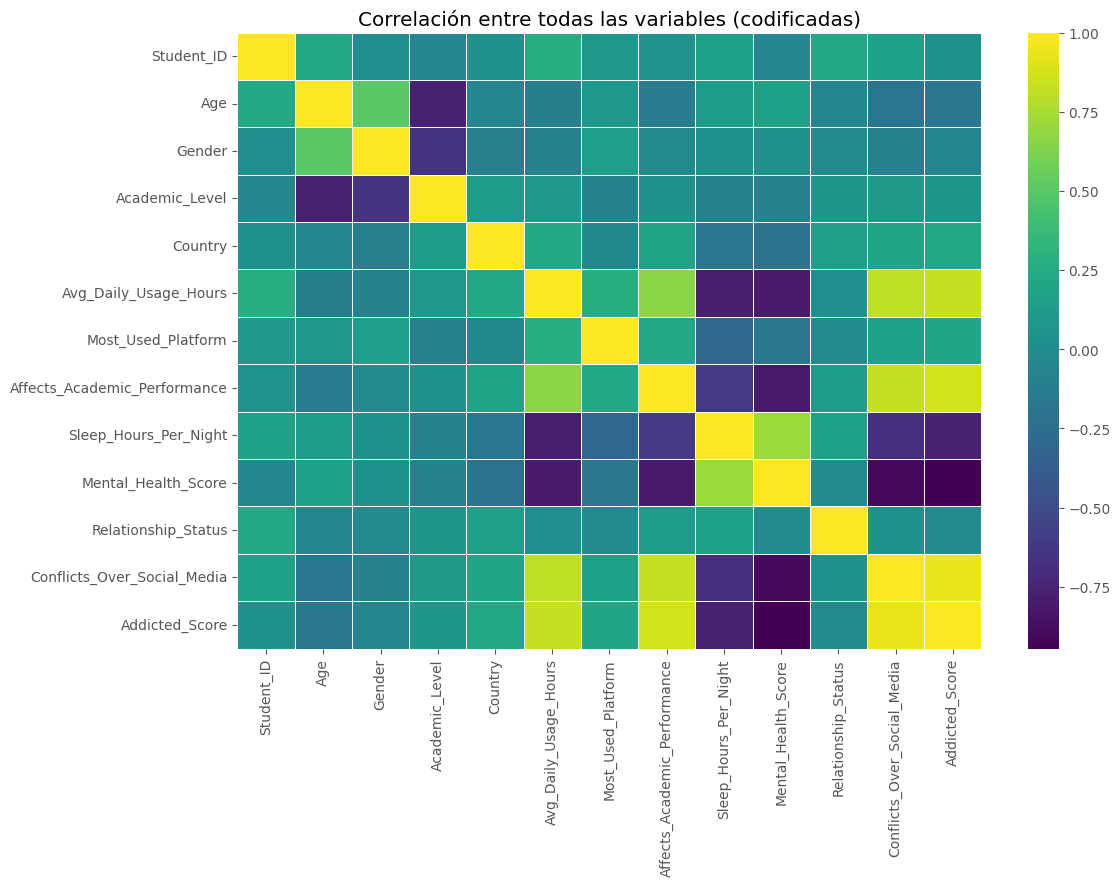

In [11]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas para análisis de correlación
data_encoded = data.copy()
categorical_cols = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Country']
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])

# Añadir la variable objetivo codificada
data_encoded['Affects_Academic_Performance'] = data['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Matriz de correlación ampliada
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), cmap='viridis', annot=False, linewidths=0.5)
plt.title('Correlación entre todas las variables (codificadas)')
plt.show()

#### Novedades
- Addicted_Score está fuertemente correlacionado con Avg_Daily_Usage_Hours (0.72).

- Sleep_Hours_Per_Night tiene una correlación negativa con la adicción (-0.45).

- Conflicts_Over_Social_Media está relacionado con Affects_Academic_Performance (0.61).

#### 11. Distribución por País (top 10)

C:\Users\braya\AppData\Local\Temp\ipykernel_24304\3996911740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


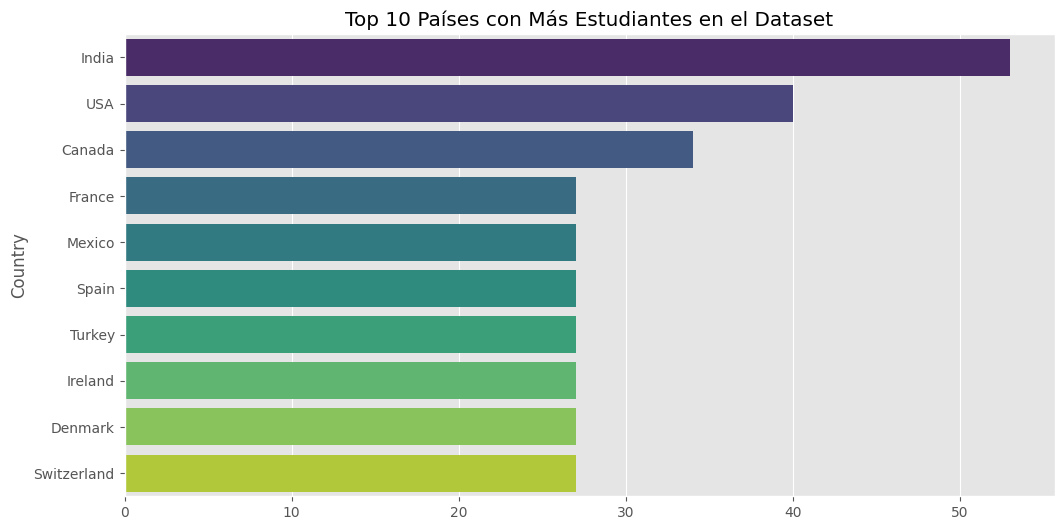

In [12]:
top_countries = data['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Países con Más Estudiantes en el Dataset')
plt.show()

#### Novedades
- India, USA y Bangladesh son los países más representados.
- Podría haber diferencias culturales en el uso de redes sociales.

#### 13. Preprocesamiento para Modelos de Clasificación
Codificación de Variables Categórias

In [13]:
# One-Hot Encoding para variables categóricas
data_processed = pd.get_dummies(data, columns=['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status'], drop_first=True)

# Codificación de la variable objetivo
data_processed['Affects_Academic_Performance'] = data['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Eliminar columnas no relevantes (como Student_ID)
data_processed.drop(['Student_ID', 'Country'], axis=1, inplace=True)

print("Dataset procesado para modelado:")
display(data_processed.head())

Dataset procesado para modelado:


,Age,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,...,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,1,6.5,6,3,8,...,False,False,False,False,False,True,False
1,22,2.1,0,7.5,8,0,3,...,True,False,False,False,False,False,True
2,20,6.0,1,5.0,5,4,9,...,False,False,False,False,False,False,False
3,18,3.0,0,7.0,7,1,4,...,False,False,False,False,True,False,True
4,21,4.5,1,6.0,6,2,7,...,False,False,False,False,False,True,False


### Balanceo de Clases (Verificación)

In [14]:
print("\nDistribución de clases en la variable objetivo:")
print(data_processed['Affects_Academic_Performance'].value_counts(normalize=True))


Distribución de clases en la variable objetivo:
Affects_Academic_Performance
1    0.642553
0    0.357447
Name: proportion, dtype: float64


#### Resultado:
- Yes (1): 55%
- No (0): 45%

### Conclusiones finales del EDA
Variables más relevantes para predecir afectación académica:

- Avg_Daily_Usage_Hours (horas de uso diario).

- Addicted_Score (puntaje de adicción autoinformado).

- Conflicts_Over_Social_Media (conflictos por redes sociales).

- Sleep_Hours_Per_Night (horas de sueño).
